# Importing / Installing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing # puts the features in standard format
from sklearn import pipeline 

In [2]:
from matplotlib.axes import Subplot as splt

In [3]:
!pip3 install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


    100% |████████████████████████████████| 215kB 6.5MB/s ta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


## FINAL DATAFRAME

In [6]:
df = pd.read_csv('csv_files/FINAL.csv')

In [7]:
df.head()

,Unemployment_rate_2010,CountyState,Percent Obese,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,County,State,Life expectancy 2010,Percent Smokers,min_wage
0,8.9,Autauga County Alabama,30.5,1706.0,12399.0,14105.0,Autauga County,Alabama,75.74,25.8,7.25
1,10.0,Baldwin County Alabama,26.6,3236.0,34173.0,37409.0,Baldwin County,Alabama,77.80,23.0,7.25
2,12.3,Barbour County Alabama,37.3,2137.0,9847.0,11984.0,Barbour County,Alabama,75.34,26.8,7.25
3,11.4,Bibb County Alabama,34.3,1195.0,6453.0,7648.0,Bibb County,Alabama,74.13,30.1,7.25
4,9.8,Blount County Alabama,30.4,2046.0,14415.0,16461.0,Blount County,Alabama,76.41,27.9,7.25


## INITIAL EXPLORATORY DATA ANALYSIS (EDA)

Let's first see which of our features are normally distributed

In [11]:
# First, we assign all of our features to variables so that we can plot them more easily

unemploy_rate = df['Unemployment_rate_2010']
percent_obese = df['Percent Obese']
num_foodstamps = df['Jan & July TOTAL Assist. Participation']
life_expect = df['Life expectancy 2010']
percent_smoke = df['Percent Smokers']
min_wage = df['min_wage']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f895b70>,
      dtype=object)

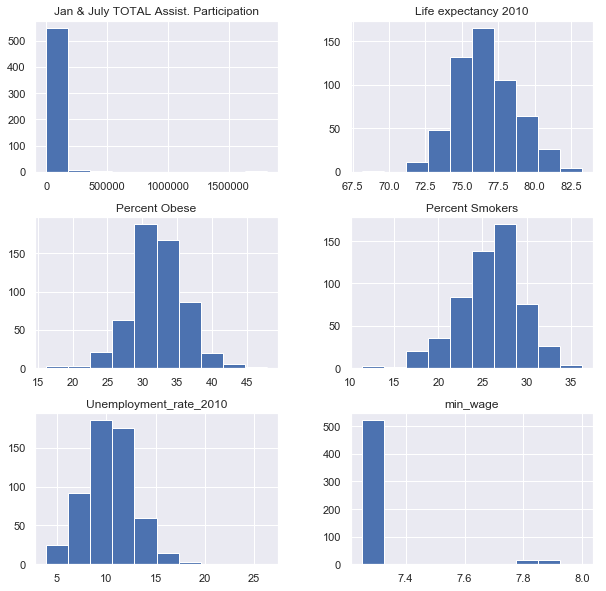

In [48]:
# Now we plot them to see what their distributions look like before we do anything to them
# 
df.hist(column=['Unemployment_rate_2010', 'Percent Obese', 'Jan & July TOTAL Assist. Participation', 'Life expectancy 2010','Percent Smokers', 'min_wage'], figsize=(10,10))
# df.hist(unemploy_rate, percent_obese)

Above, we can see that that majority of our data is normally distributed, which is great! 

We can also see, however, that some strange things are going on with our food stamps data and our minimum wage data.

 - We know that our minimum-wage data's weirdness is due to the fact that it is on the state-level, while the rest of our data is on the county-level. So, we can leave that one alone for now.

- However, can see that the scale of our food stamps data is all wacky. In order to bring its distribution into a better perspective, let's "log-transform" it. (When we log-transform a dataset, we are doing _, thereby helping it become less skewed and lowering its variability.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a4e1f60>]],
      dtype=object)

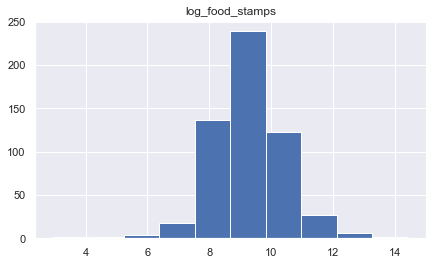

In [53]:
# Log-transforming our food stamps data:

# 1) Create new dataframe to pass in log values of Food Stamps var
data_log = pd.DataFrame([])

# 2) Create columns to hold log values
data_log['log_food_stamps'] = np.log(df['Jan & July TOTAL Assist. Participation'])

# 3) If value is zero, it will be negative inf when taking the log
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_food_stamps'], how="all")

# 4) Graph the normalized histogram
data_log.hist(figsize=[7,4])


Now that looks **much better**!

In order to run a linear regression analysis, our data needs to meet three criteria: 
- it needs to be normally distributed (which we already know it is)
- it needs to be linear 
- it needs _ 

In [ ]:
# scatters showing linearity of features

It would also be interesting to see the average life expectancy per state:

<BarContainer object of 29 artists>

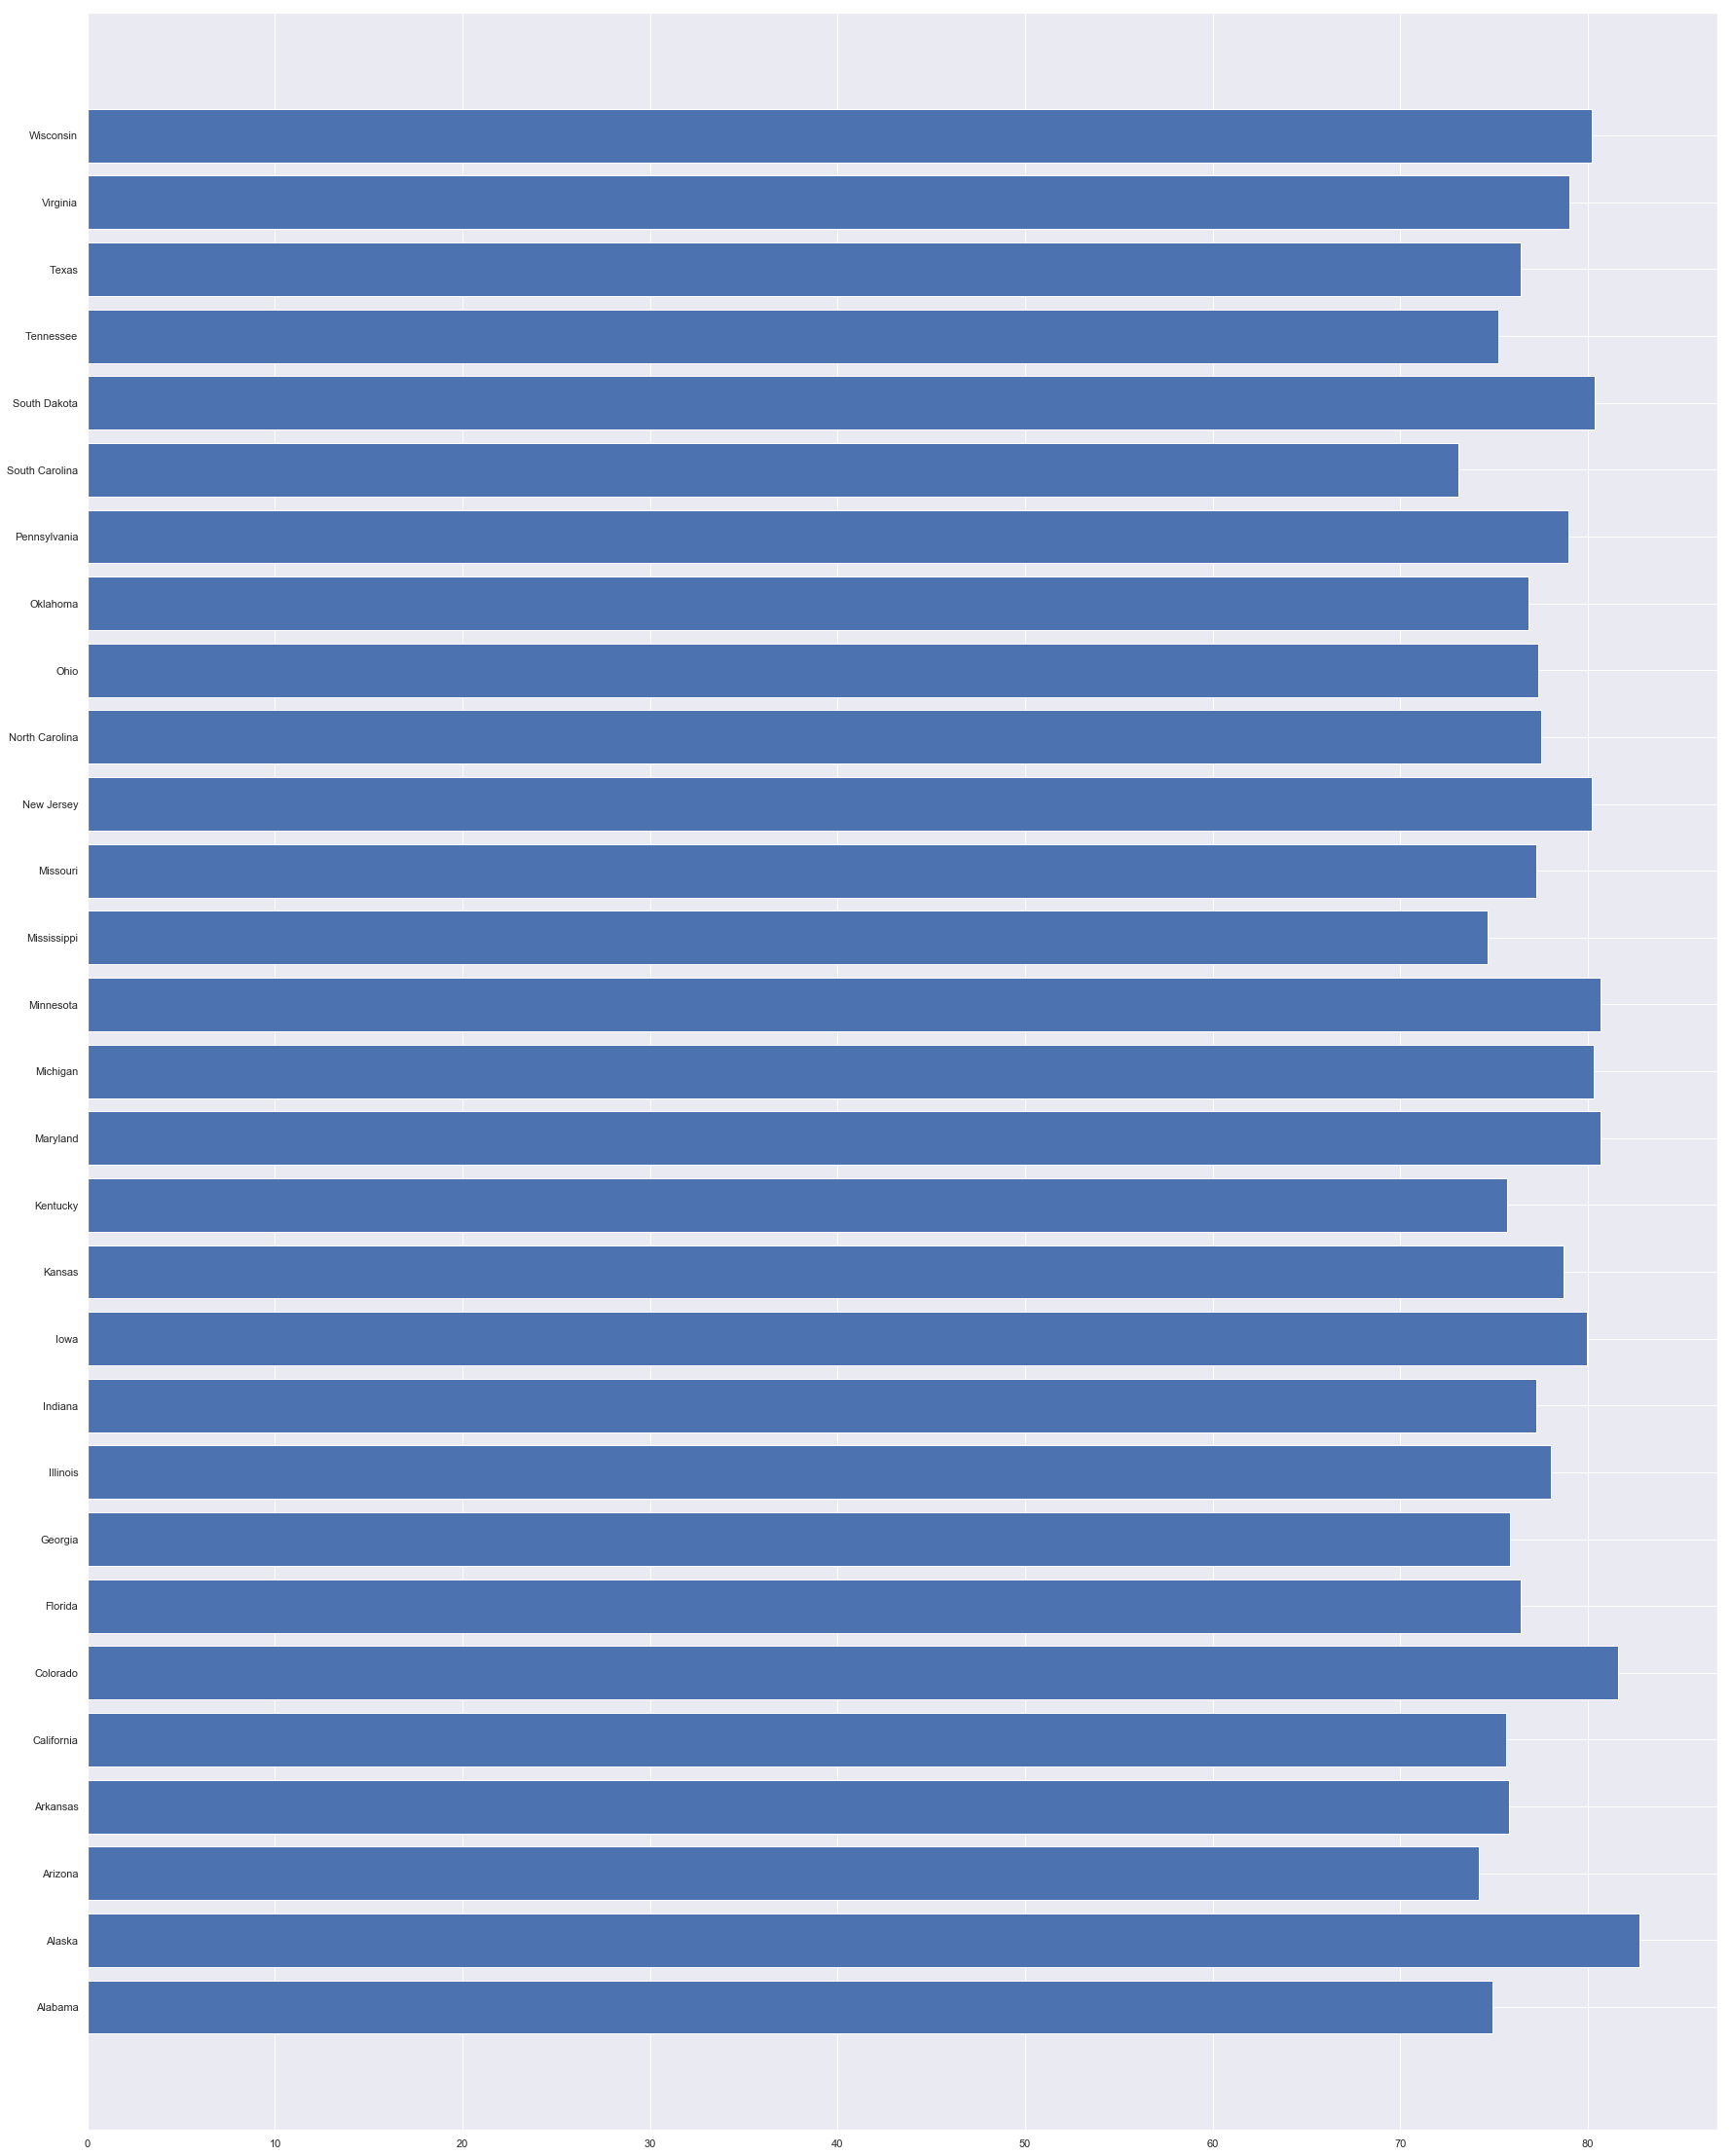

In [157]:
# group by state

grouped_by_state = round(df.groupby(['State'], axis=0).mean(),2).add_suffix('_by state').reset_index()

plt.barh(y=grouped_by_state['State'], width=grouped_by_state['Life expectancy 2010_by state'])


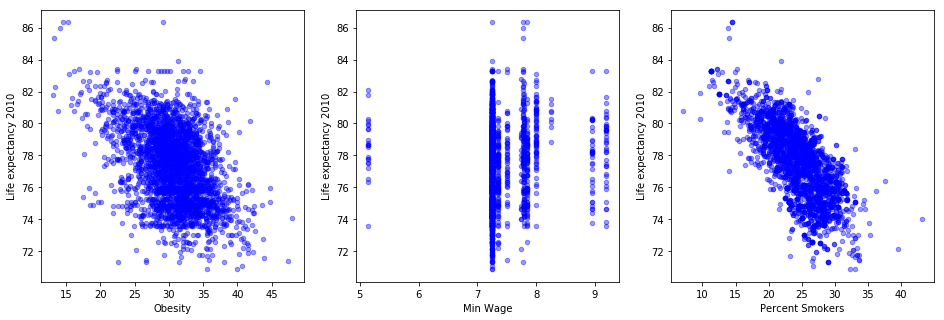

In [5]:
# Create EDA for continuous variables

# Scatter plots showing relationships between target and continuous variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

# Loop through continuous variables to create scatter plots, checkin' 'em out!
for xcol, ax in zip(['Obesity', 'Min Wage', 'Percent Smokers'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy 2010', ax=ax, alpha=0.4, color='b')

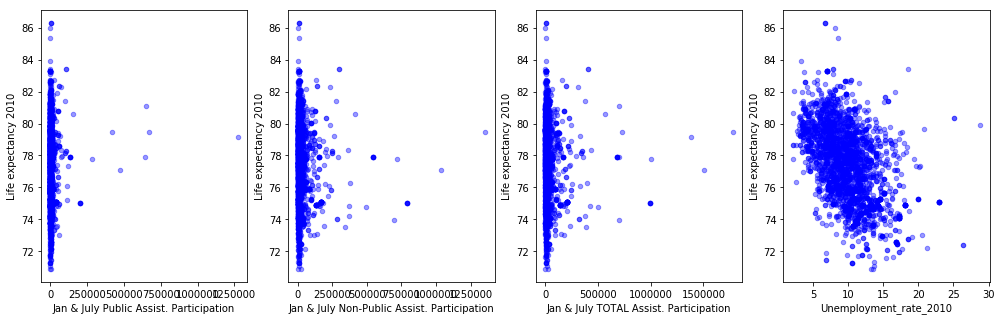

In [6]:
# Scatter plots showing relationships between target and continuous variables PART 2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5))

for xcol, ax in zip(['Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy 2010', ax=ax, alpha=0.4, color='b')

# The graphs for Public Assistance have large outliers


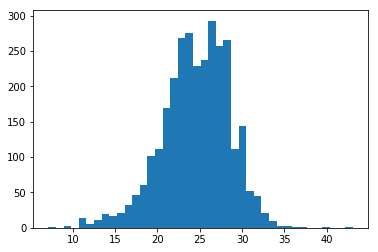

In [46]:
# Initial test of hist for one contiuous variable

plt.hist(df['Percent Smokers'], bins=40)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ee31358>,
      dtype=object)

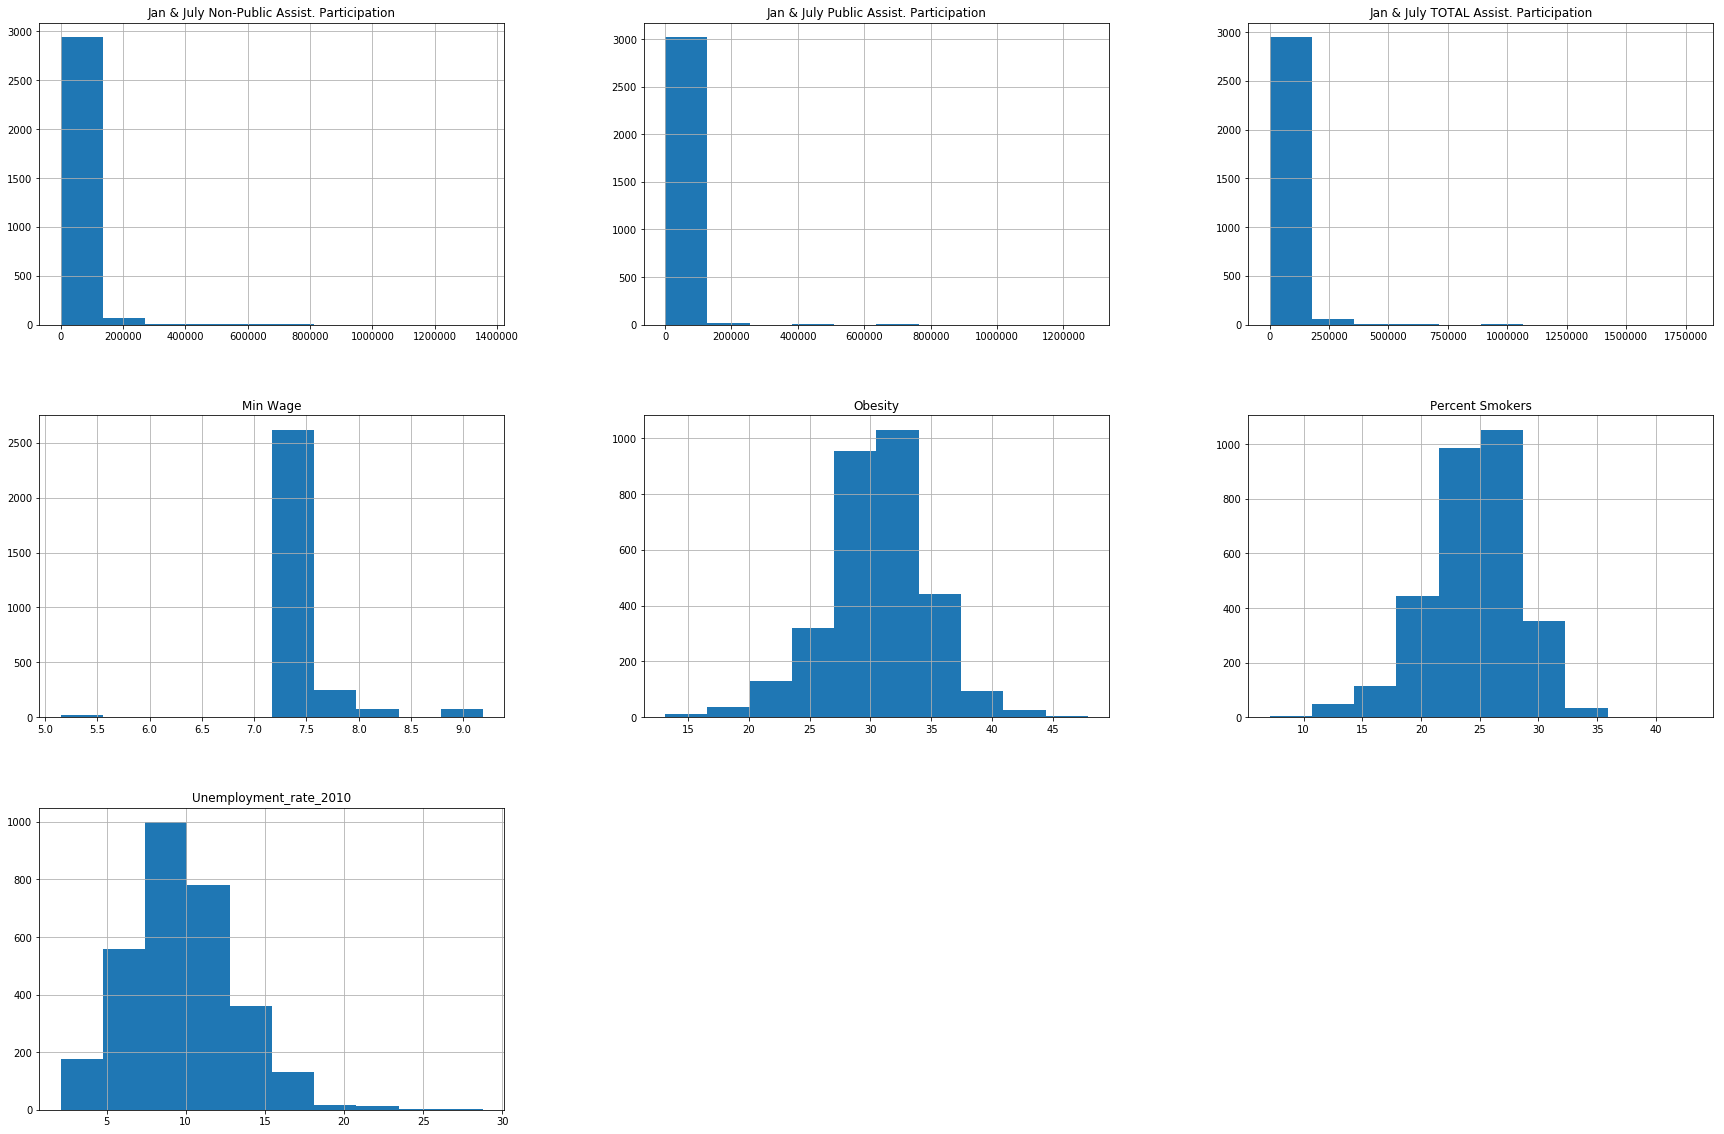

In [27]:
# Histograms of all contiuous variables

df.hist(column=['Obesity', 'Min Wage', 'Percent Smokers', 'Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], figsize=(30,20))
                
                

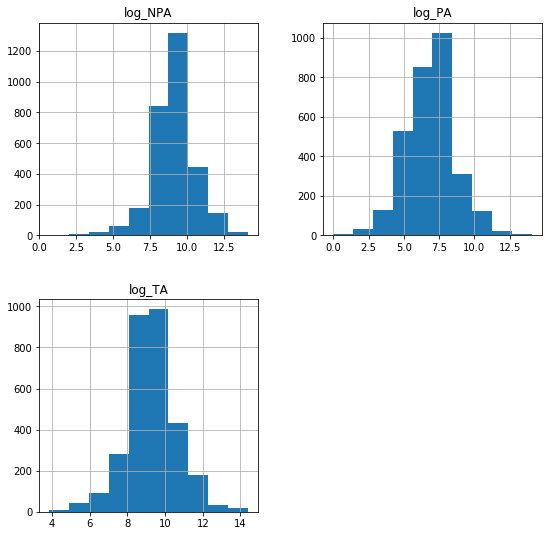

In [47]:
# Run log transform on Food Stamps vars after checking initial histogram for normality

# Create new dataframe to pass in log values of Food Stamps var
data_log = pd.DataFrame([])

# Create columns to hold log values
data_log['log_PA'] = np.log(df['Jan & July Public Assist. Participation'])
data_log['log_NPA'] = np.log(df['Jan & July Non-Public Assist. Participation'])
data_log['log_TA'] = np.log(df['Jan & July TOTAL Assist. Participation'])

# If value is zero, it will be negative inf when taking the log
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_PA'], how="all")
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_NPA'], how="all")
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_TA'], how="all")

# Graphing the normalized histogram
data_log.hist(figsize=[9,9]);


In [61]:
data_log.head()

,log_PA,log_NPA,log_TA
index,,,
0,7.441907,9.425371,9.554285
1,8.082093,10.439191,10.529667
2,8.082093,10.439191,10.529667
3,7.667158,9.194922,9.391328
4,7.667158,9.194922,9.391328


In [60]:
# We are joining our log-ed cat vars with our original dataframe to perform OLS analysis later

final_with_logs = df.join(data_log, how= 'outer').dropna()

final_with_logs.to_csv('csv_files/final_with_logs.csv', encoding='utf-8', index=False)
